## Yelp Review Dataset

In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [22]:
reviews_df = pd.read_csv('yelp_review.csv')

In [23]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5261668 entries, 0 to 5261667
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   review_id    object
 1   user_id      object
 2   business_id  object
 3   stars        int64 
 4   date         object
 5   text         object
 6   useful       int64 
 7   funny        int64 
 8   cool         int64 
dtypes: int64(4), object(5)
memory usage: 361.3+ MB


In [24]:
reviews_df.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


## Yelp Business Dataset

In [25]:
business_csv = pd.read_csv('yelp_business.csv')

In [26]:
business_csv.state.unique()

array(['AZ', 'PA', 'OH', 'BW', 'NV', 'ON', 'NC', 'WI', 'SC', 'QC', 'IL',
       'MLN', 'EDH', 'FIF', 'CHE', 'CO', 'NYK', 'NE', 'HLD', 'WLN', 'ABE',
       'WA', 'SCB', 'KHL', 'ESX', 'CMA', 'FAL', 'ELN', 'NY', 'PKN', 'ST',
       '01', 'CA', 'NLK', 'GLG', 'C', 'VS', 'IN', 'XGL', 'AL', 'STG',
       'VT', 'CS', '30', 'AR', 'SL', 'NI', 'BY', 'AK', 'FLN', nan, 'FL',
       'MN', '6', 'NTH', 'MT', 'B', 'GA', 'VA', 'DE', 'AB', 'HU', 'KY',
       '3', 'TAM', 'ZET', 'RCC', 'WHT'], dtype=object)

In [27]:
business_list = business_csv.city.unique().tolist()

Filter businesses according to city, review count and stars

In [233]:
# function to filter businesses according to city, review count and stars
def filter_business(df, city, review_count, stars):
    filtered_df = df[(df['city'] == city) & (df['categories'].str.contains("Restaurants"))
                               & (df['review_count'] > review_count)
                               & (df['stars'] >= stars)]
    return filtered_df

In [234]:
restaurants_lasvegas = filter_business(business_csv, city = 'Las Vegas', review_count = 2000, stars = 3)
restaurants_lasvegas

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
5068,G-5kEa6E6PD5fkBRuA7k9Q,"""Giada""",The Strip,"""The Cromwell Las Vegas Resort & Casino, 3595 ...",Las Vegas,NV,89109,36.115059,-115.172109,3.5,2349,1,Italian;Restaurants
6782,rcaPajgKOJC2vo_l3xa42A,"""Bouchon at the Venezia Tower""",The Strip,"""3355 Las Vegas Blvd S, Venezia Tower, 10th fl...",Las Vegas,NV,89109,36.120955,-115.169853,4.0,3570,1,Breakfast & Brunch;Venues & Event Spaces;Event...
10567,El4FC8jcawUVgw_0EIcbaQ,"""MGM Grand Hotel""",The Strip,"""3799 Las Vegas Blvd S""",Las Vegas,NV,89109,36.102251,-115.169968,3.0,3444,1,Restaurants;Arts & Entertainment;Hotels;Event ...
19191,f4x1YBxkLrZg652xt2KR5g,"""Hash House A Go Go""",The Strip,"""3535 Las Vegas Blvd""",Las Vegas,NV,89109,36.118181,-115.171580,4.0,4774,1,American (New);Restaurants;Breakfast & Brunch
20329,UPIYuRaZvknINOd1w8kqRQ,"""Monta Ramen""",Chinatown,"""5030 Spring Mountain Rd, Ste 6""",Las Vegas,NV,89146,36.127034,-115.209682,4.0,2291,1,Restaurants;Noodles;Ramen;Japanese
21006,eoHdUeQDNgQ6WYEnP2aiRw,"""Serendipity 3""",The Strip,"""Caesars Palace Las Vegas Hotel And Casino, 35...",Las Vegas,NV,89109,36.115670,-115.173317,3.0,3910,0,Social Clubs;Arts & Entertainment;American (Tr...
24586,XXW_OFaYQkkGOGniujZFHg,"""The Peppermill Restaurant & Fireside Lounge""",The Strip,"""2985 Las Vegas Blvd S""",Las Vegas,NV,89109,36.133667,-115.163095,4.0,2703,1,Bars;American (Traditional);Lounges;Nightlife;...
25096,iCQpiavjjPzJ5_3gPD5Ebg,"""Secret Pizza""",The Strip,"""The Cosmopolitan Of Las Vegas, 3708 Las Vegas...",Las Vegas,NV,89109,36.112372,-115.173064,4.0,3741,1,Pizza;Restaurants
27862,QJatAcxYgK1Zp9BRZMAx7g,"""Shake Shack""",The Strip,"""3790 Las Vegas Blvd S""",Las Vegas,NV,89109,36.103061,-115.173450,4.0,2549,1,Burgers;American (New);Restaurants
36120,HhVmDybpU7L50Kb5A0jXTg,"""Guy Fieri's Vegas Kitchen & Bar""",The Strip,"""3535 S Las Vegas Blvd""",Las Vegas,NV,89109,36.118080,-115.172432,3.5,2674,1,American (New);Burgers;Restaurants;Pubs;Nightl...


In [235]:
restaurants_lasvegas.neighborhood.unique()

array(['The Strip', 'Chinatown', 'Westside', nan, 'Southeast', 'Downtown',
       'Eastside'], dtype=object)

Check for unique categories in las vegas restaurants

In [236]:
restaurants_lasvegas.categories.tolist()

results = []

for i in restaurants_lasvegas.categories.tolist():
    results.extend(i.split(";"))
set(results)

{'African',
 'American (New)',
 'American (Traditional)',
 'Arts & Entertainment',
 'Asian Fusion',
 'Automotive',
 'Bakeries',
 'Barbeque',
 'Bars',
 'Beer',
 'Breakfast & Brunch',
 'British',
 'Buffets',
 'Burgers',
 'Cafes',
 'Car Dealers',
 'Casinos',
 'Caterers',
 'Cheesesteaks',
 'Chinese',
 'Dance Clubs',
 'Desserts',
 'Dim Sum',
 'Event Planning & Services',
 'Fish & Chips',
 'Food',
 'Food Delivery Services',
 'French',
 'Gastropubs',
 'Hotels',
 'Hotels & Travel',
 'Italian',
 'Japanese',
 'Korean',
 'Lounges',
 'Mexican',
 'Music Venues',
 'New Mexican Cuisine',
 'Nightlife',
 'Noodles',
 'Pizza',
 'Pubs',
 'Ramen',
 'Resorts',
 'Restaurants',
 'Salad',
 'Sandwiches',
 'Seafood',
 'Social Clubs',
 'Soul Food',
 'Soup',
 'Southern',
 'Steakhouses',
 'Tacos',
 'Tapas/Small Plates',
 'Tex-Mex',
 'Thai',
 'Venues & Event Spaces',
 'Vietnamese',
 'Wine & Spirits',
 'Wine Bars',
 'Wraps'}

Check for las vegas restaurants with NA values for categories

In [237]:
lasvegas_no_na_subset = restaurants_lasvegas[~restaurants_lasvegas['neighborhood'].isna()]
lasvegas_no_na_subset

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
5068,G-5kEa6E6PD5fkBRuA7k9Q,"""Giada""",The Strip,"""The Cromwell Las Vegas Resort & Casino, 3595 ...",Las Vegas,NV,89109,36.115059,-115.172109,3.5,2349,1,Italian;Restaurants
6782,rcaPajgKOJC2vo_l3xa42A,"""Bouchon at the Venezia Tower""",The Strip,"""3355 Las Vegas Blvd S, Venezia Tower, 10th fl...",Las Vegas,NV,89109,36.120955,-115.169853,4.0,3570,1,Breakfast & Brunch;Venues & Event Spaces;Event...
10567,El4FC8jcawUVgw_0EIcbaQ,"""MGM Grand Hotel""",The Strip,"""3799 Las Vegas Blvd S""",Las Vegas,NV,89109,36.102251,-115.169968,3.0,3444,1,Restaurants;Arts & Entertainment;Hotels;Event ...
19191,f4x1YBxkLrZg652xt2KR5g,"""Hash House A Go Go""",The Strip,"""3535 Las Vegas Blvd""",Las Vegas,NV,89109,36.118181,-115.171580,4.0,4774,1,American (New);Restaurants;Breakfast & Brunch
20329,UPIYuRaZvknINOd1w8kqRQ,"""Monta Ramen""",Chinatown,"""5030 Spring Mountain Rd, Ste 6""",Las Vegas,NV,89146,36.127034,-115.209682,4.0,2291,1,Restaurants;Noodles;Ramen;Japanese
21006,eoHdUeQDNgQ6WYEnP2aiRw,"""Serendipity 3""",The Strip,"""Caesars Palace Las Vegas Hotel And Casino, 35...",Las Vegas,NV,89109,36.115670,-115.173317,3.0,3910,0,Social Clubs;Arts & Entertainment;American (Tr...
24586,XXW_OFaYQkkGOGniujZFHg,"""The Peppermill Restaurant & Fireside Lounge""",The Strip,"""2985 Las Vegas Blvd S""",Las Vegas,NV,89109,36.133667,-115.163095,4.0,2703,1,Bars;American (Traditional);Lounges;Nightlife;...
25096,iCQpiavjjPzJ5_3gPD5Ebg,"""Secret Pizza""",The Strip,"""The Cosmopolitan Of Las Vegas, 3708 Las Vegas...",Las Vegas,NV,89109,36.112372,-115.173064,4.0,3741,1,Pizza;Restaurants
27862,QJatAcxYgK1Zp9BRZMAx7g,"""Shake Shack""",The Strip,"""3790 Las Vegas Blvd S""",Las Vegas,NV,89109,36.103061,-115.173450,4.0,2549,1,Burgers;American (New);Restaurants
36120,HhVmDybpU7L50Kb5A0jXTg,"""Guy Fieri's Vegas Kitchen & Bar""",The Strip,"""3535 S Las Vegas Blvd""",Las Vegas,NV,89109,36.118080,-115.172432,3.5,2674,1,American (New);Burgers;Restaurants;Pubs;Nightl...


In [238]:
lasvegas_na_subset = restaurants_lasvegas[restaurants_lasvegas['neighborhood'].isna()]
lasvegas_na_subset

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
89974,fL-b760btOaGa85OJ9ut3w,"""Rollin Smoke Barbeque""",NaN,"""3185 S Highland Dr, Ste 2""",Las Vegas,NV,89109,36.132188,-115.177096,4.5,2320,1,Restaurants;Soul Food;Burgers;Barbeque
123599,awI4hHMfa7H0Xf0-ChU5hg,"""Oyster Bar""",NaN,"""2411 W Sahara Ave""",Las Vegas,NV,89102,36.142782,-115.174747,4.5,2125,1,Restaurants;Bars;Seafood;Nightlife


#### Fill NaN neighborhoods by searching the closest neighborhood from the restaurant

In [239]:
from geopy import distance

lasvegas_na_dict = lasvegas_na_subset.to_dict('records')
lasvegas_no_na_dict = lasvegas_no_na_subset.to_dict('records')

def get_closest_neighborhood(list_restaurants, location):
    # location is tuple of lat and long values
    closest_distance = 100
    closest_neighborhood = ""

    for i,r_dict in enumerate(list_restaurants):
        
        r_lat_long = (r_dict['latitude'], r_dict['longitude'])
        current_distance = distance.distance(location, r_lat_long).km

        # if current iteration of restaurant is closer 
        if current_distance < closest_distance:
            closest_distance = current_distance
            closest_neighborhood = r_dict['neighborhood']
        
    
    print(closest_distance)
    return closest_neighborhood
        

In [240]:
for na_rest in lasvegas_na_dict:
    location = (na_rest['latitude'], na_rest['longitude'])
    na_rest['neighborhood'] = get_closest_neighborhood(lasvegas_no_na_dict, location)

1.111766562931265
1.45696589845987


In [241]:
restaurants_lasvegas = pd.DataFrame(lasvegas_na_dict+lasvegas_no_na_dict)
restaurants_lasvegas

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,fL-b760btOaGa85OJ9ut3w,"""Rollin Smoke Barbeque""",The Strip,"""3185 S Highland Dr, Ste 2""",Las Vegas,NV,89109,36.132188,-115.177096,4.5,2320,1,Restaurants;Soul Food;Burgers;Barbeque
1,awI4hHMfa7H0Xf0-ChU5hg,"""Oyster Bar""",The Strip,"""2411 W Sahara Ave""",Las Vegas,NV,89102,36.142782,-115.174747,4.5,2125,1,Restaurants;Bars;Seafood;Nightlife
2,G-5kEa6E6PD5fkBRuA7k9Q,"""Giada""",The Strip,"""The Cromwell Las Vegas Resort & Casino, 3595 ...",Las Vegas,NV,89109,36.115059,-115.172109,3.5,2349,1,Italian;Restaurants
3,rcaPajgKOJC2vo_l3xa42A,"""Bouchon at the Venezia Tower""",The Strip,"""3355 Las Vegas Blvd S, Venezia Tower, 10th fl...",Las Vegas,NV,89109,36.120955,-115.169853,4.0,3570,1,Breakfast & Brunch;Venues & Event Spaces;Event...
4,El4FC8jcawUVgw_0EIcbaQ,"""MGM Grand Hotel""",The Strip,"""3799 Las Vegas Blvd S""",Las Vegas,NV,89109,36.102251,-115.169968,3.0,3444,1,Restaurants;Arts & Entertainment;Hotels;Event ...
5,f4x1YBxkLrZg652xt2KR5g,"""Hash House A Go Go""",The Strip,"""3535 Las Vegas Blvd""",Las Vegas,NV,89109,36.118181,-115.171580,4.0,4774,1,American (New);Restaurants;Breakfast & Brunch
6,UPIYuRaZvknINOd1w8kqRQ,"""Monta Ramen""",Chinatown,"""5030 Spring Mountain Rd, Ste 6""",Las Vegas,NV,89146,36.127034,-115.209682,4.0,2291,1,Restaurants;Noodles;Ramen;Japanese
7,eoHdUeQDNgQ6WYEnP2aiRw,"""Serendipity 3""",The Strip,"""Caesars Palace Las Vegas Hotel And Casino, 35...",Las Vegas,NV,89109,36.115670,-115.173317,3.0,3910,0,Social Clubs;Arts & Entertainment;American (Tr...
8,XXW_OFaYQkkGOGniujZFHg,"""The Peppermill Restaurant & Fireside Lounge""",The Strip,"""2985 Las Vegas Blvd S""",Las Vegas,NV,89109,36.133667,-115.163095,4.0,2703,1,Bars;American (Traditional);Lounges;Nightlife;...
9,iCQpiavjjPzJ5_3gPD5Ebg,"""Secret Pizza""",The Strip,"""The Cosmopolitan Of Las Vegas, 3708 Las Vegas...",Las Vegas,NV,89109,36.112372,-115.173064,4.0,3741,1,Pizza;Restaurants


Make categories into dummies

In [242]:
category_cols = ['American',
       'Asian Fusion', 'Bakeries', 'Bars', 'Breakfast & Brunch', 'British',
       'Buffets', 'Burgers', 'Caribbean', 'Cafes', 'Caterers', 'Chinese',
       'Desserts', 'French', 'German', 'Gluten-Free', 'Indian', 'Hawaiian',
       'Italian', 'Japanese', 'Korean', 'Latin American', 'Mediterranean',
       'Mexican', 'Music Venues', 'Nightlife', 'Seafood', 'Salad', 'Spanish',
       'Thai', 'Vegan', 'Vegetarian', 'Vietnamese', 'Canadian']

In [243]:
restaurants_lasvegas['categories'].apply(lambda x: x.split(";"))

0           [Restaurants, Soul Food, Burgers, Barbeque]
1               [Restaurants, Bars, Seafood, Nightlife]
2                                [Italian, Restaurants]
3     [Breakfast & Brunch, Venues & Event Spaces, Ev...
4     [Restaurants, Arts & Entertainment, Hotels, Ev...
5     [American (New), Restaurants, Breakfast & Brunch]
6               [Restaurants, Noodles, Ramen, Japanese]
7     [Social Clubs, Arts & Entertainment, American ...
8     [Bars, American (Traditional), Lounges, Nightl...
9                                  [Pizza, Restaurants]
10               [Burgers, American (New), Restaurants]
11    [American (New), Burgers, Restaurants, Pubs, N...
12    [Bars, Restaurants, Asian Fusion, Dance Clubs,...
13    [New Mexican Cuisine, Mexican, Restaurants, So...
14    [Restaurants, Breakfast & Brunch, American (New)]
15           [Buffets, Breakfast & Brunch, Restaurants]
16              [Restaurants, American (New), Southern]
17                               [Buffets, Resta

In [244]:
original_list = restaurants_lasvegas['categories'].apply(lambda x: x.split(";")).tolist()

In [245]:
original_list = [[s[:-6] if s.endswith('(New)') else s for s in sub_list] for sub_list in original_list]
original_list = [[s[:-14] if s.endswith('(Traditional)') else s for s in sub_list] for sub_list in original_list]
original_list = [list(set(sub_list)) for sub_list in original_list]

In [246]:
original_list

[['Restaurants', 'Burgers', 'Soul Food', 'Barbeque'],
 ['Seafood', 'Restaurants', 'Bars', 'Nightlife'],
 ['Italian', 'Restaurants'],
 ['Venues & Event Spaces',
  'Food',
  'Breakfast & Brunch',
  'French',
  'Restaurants',
  'Cafes',
  'Bakeries',
  'Event Planning & Services'],
 ['Hotels',
  'Restaurants',
  'Casinos',
  'Arts & Entertainment',
  'Hotels & Travel',
  'Event Planning & Services',
  'Resorts'],
 ['Restaurants', 'Breakfast & Brunch', 'American'],
 ['Japanese', 'Restaurants', 'Noodles', 'Ramen'],
 ['Food',
  'American',
  'Restaurants',
  'Desserts',
  'Social Clubs',
  'Arts & Entertainment'],
 ['Lounges',
  'American',
  'Breakfast & Brunch',
  'Nightlife',
  'Restaurants',
  'Bars'],
 ['Restaurants', 'Pizza'],
 ['Restaurants', 'Burgers', 'American'],
 ['Pubs',
  'Breakfast & Brunch',
  'American',
  'Nightlife',
  'Restaurants',
  'Burgers',
  'African',
  'Bars'],
 ['Dance Clubs',
  'Lounges',
  'Music Venues',
  'Nightlife',
  'Asian Fusion',
  'Restaurants',
  'Arts

In [247]:
final_list = []
for lst in original_list:

    newlst = [x for x in lst if x in category_cols]
    final_list.append(newlst)

In [248]:
restaurants_lasvegas['categories'] = final_list

In [249]:
restaurants_lasvegas

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,fL-b760btOaGa85OJ9ut3w,"""Rollin Smoke Barbeque""",The Strip,"""3185 S Highland Dr, Ste 2""",Las Vegas,NV,89109,36.132188,-115.177096,4.5,2320,1,[Burgers]
1,awI4hHMfa7H0Xf0-ChU5hg,"""Oyster Bar""",The Strip,"""2411 W Sahara Ave""",Las Vegas,NV,89102,36.142782,-115.174747,4.5,2125,1,"[Seafood, Bars, Nightlife]"
2,G-5kEa6E6PD5fkBRuA7k9Q,"""Giada""",The Strip,"""The Cromwell Las Vegas Resort & Casino, 3595 ...",Las Vegas,NV,89109,36.115059,-115.172109,3.5,2349,1,[Italian]
3,rcaPajgKOJC2vo_l3xa42A,"""Bouchon at the Venezia Tower""",The Strip,"""3355 Las Vegas Blvd S, Venezia Tower, 10th fl...",Las Vegas,NV,89109,36.120955,-115.169853,4.0,3570,1,"[Breakfast & Brunch, French, Cafes, Bakeries]"
4,El4FC8jcawUVgw_0EIcbaQ,"""MGM Grand Hotel""",The Strip,"""3799 Las Vegas Blvd S""",Las Vegas,NV,89109,36.102251,-115.169968,3.0,3444,1,[]
5,f4x1YBxkLrZg652xt2KR5g,"""Hash House A Go Go""",The Strip,"""3535 Las Vegas Blvd""",Las Vegas,NV,89109,36.118181,-115.171580,4.0,4774,1,"[Breakfast & Brunch, American]"
6,UPIYuRaZvknINOd1w8kqRQ,"""Monta Ramen""",Chinatown,"""5030 Spring Mountain Rd, Ste 6""",Las Vegas,NV,89146,36.127034,-115.209682,4.0,2291,1,[Japanese]
7,eoHdUeQDNgQ6WYEnP2aiRw,"""Serendipity 3""",The Strip,"""Caesars Palace Las Vegas Hotel And Casino, 35...",Las Vegas,NV,89109,36.115670,-115.173317,3.0,3910,0,"[American, Desserts]"
8,XXW_OFaYQkkGOGniujZFHg,"""The Peppermill Restaurant & Fireside Lounge""",The Strip,"""2985 Las Vegas Blvd S""",Las Vegas,NV,89109,36.133667,-115.163095,4.0,2703,1,"[American, Breakfast & Brunch, Nightlife, Bars]"
9,iCQpiavjjPzJ5_3gPD5Ebg,"""Secret Pizza""",The Strip,"""The Cosmopolitan Of Las Vegas, 3708 Las Vegas...",Las Vegas,NV,89109,36.112372,-115.173064,4.0,3741,1,[]


In [250]:
restaurants_lasvegas.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,fL-b760btOaGa85OJ9ut3w,"""Rollin Smoke Barbeque""",The Strip,"""3185 S Highland Dr, Ste 2""",Las Vegas,NV,89109,36.132188,-115.177096,4.5,2320,1,[Burgers]
1,awI4hHMfa7H0Xf0-ChU5hg,"""Oyster Bar""",The Strip,"""2411 W Sahara Ave""",Las Vegas,NV,89102,36.142782,-115.174747,4.5,2125,1,"[Seafood, Bars, Nightlife]"
2,G-5kEa6E6PD5fkBRuA7k9Q,"""Giada""",The Strip,"""The Cromwell Las Vegas Resort & Casino, 3595 ...",Las Vegas,NV,89109,36.115059,-115.172109,3.5,2349,1,[Italian]
3,rcaPajgKOJC2vo_l3xa42A,"""Bouchon at the Venezia Tower""",The Strip,"""3355 Las Vegas Blvd S, Venezia Tower, 10th fl...",Las Vegas,NV,89109,36.120955,-115.169853,4.0,3570,1,"[Breakfast & Brunch, French, Cafes, Bakeries]"
4,El4FC8jcawUVgw_0EIcbaQ,"""MGM Grand Hotel""",The Strip,"""3799 Las Vegas Blvd S""",Las Vegas,NV,89109,36.102251,-115.169968,3.0,3444,1,[]


(array([31.,  0.,  2.,  0.,  2.,  0.,  1.,  0.,  1.,  1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

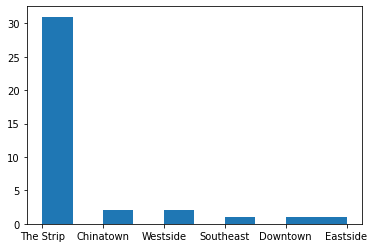

In [251]:
plt.hist(restaurants_lasvegas.neighborhood)

In [252]:
dummy_df = pd.get_dummies(restaurants_lasvegas['categories'].apply(pd.Series).stack()).sum(level =0)

C:\Users\raych\AppData\Local\Temp\ipykernel_18572\4289670488.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dummy_df = pd.get_dummies(restaurants_lasvegas['categories'].apply(pd.Series).stack()).sum(level =0)
C:\Users\raych\AppData\Local\Temp\ipykernel_18572\4289670488.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummy_df = pd.get_dummies(restaurants_lasvegas['categories'].apply(pd.Series).stack()).sum(level =0)


In [253]:
restaurants_lasvegas = pd.concat([restaurants_lasvegas, dummy_df], axis = 1).drop(columns = 'categories')
restaurants_lasvegas

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,...,Italian,Japanese,Korean,Mexican,Music Venues,Nightlife,Salad,Seafood,Thai,Vietnamese
0,fL-b760btOaGa85OJ9ut3w,"""Rollin Smoke Barbeque""",The Strip,"""3185 S Highland Dr, Ste 2""",Las Vegas,NV,89109,36.132188,-115.177096,4.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,awI4hHMfa7H0Xf0-ChU5hg,"""Oyster Bar""",The Strip,"""2411 W Sahara Ave""",Las Vegas,NV,89102,36.142782,-115.174747,4.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,G-5kEa6E6PD5fkBRuA7k9Q,"""Giada""",The Strip,"""The Cromwell Las Vegas Resort & Casino, 3595 ...",Las Vegas,NV,89109,36.115059,-115.172109,3.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,rcaPajgKOJC2vo_l3xa42A,"""Bouchon at the Venezia Tower""",The Strip,"""3355 Las Vegas Blvd S, Venezia Tower, 10th fl...",Las Vegas,NV,89109,36.120955,-115.169853,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,El4FC8jcawUVgw_0EIcbaQ,"""MGM Grand Hotel""",The Strip,"""3799 Las Vegas Blvd S""",Las Vegas,NV,89109,36.102251,-115.169968,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,f4x1YBxkLrZg652xt2KR5g,"""Hash House A Go Go""",The Strip,"""3535 Las Vegas Blvd""",Las Vegas,NV,89109,36.118181,-115.171580,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,UPIYuRaZvknINOd1w8kqRQ,"""Monta Ramen""",Chinatown,"""5030 Spring Mountain Rd, Ste 6""",Las Vegas,NV,89146,36.127034,-115.209682,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,eoHdUeQDNgQ6WYEnP2aiRw,"""Serendipity 3""",The Strip,"""Caesars Palace Las Vegas Hotel And Casino, 35...",Las Vegas,NV,89109,36.115670,-115.173317,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,XXW_OFaYQkkGOGniujZFHg,"""The Peppermill Restaurant & Fireside Lounge""",The Strip,"""2985 Las Vegas Blvd S""",Las Vegas,NV,89109,36.133667,-115.163095,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,iCQpiavjjPzJ5_3gPD5Ebg,"""Secret Pizza""",The Strip,"""The Cosmopolitan Of Las Vegas, 3708 Las Vegas...",Las Vegas,NV,89109,36.112372,-115.173064,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove NAN values for restaurants`

In [255]:
restaurants_lasvegas.dropna(inplace = True)

Convert neighborhood to dummies

In [257]:

neighborhood_dummies = pd.get_dummies(restaurants_lasvegas.neighborhood,drop_first=True)
neighborhood_dummies

,Downtown,Eastside,Southeast,The Strip,Westside
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,0,0
7,0,0,0,1,0
8,0,0,0,1,0
10,0,0,0,1,0
11,0,0,0,1,0


Centenial Dummy Dropped

In [258]:
neighborhood_dummies.columns.to_list()

['Downtown', 'Eastside', 'Southeast', 'The Strip', 'Westside']

In [259]:
# merge back dummies with dataset

restaurants_lasvegas = pd.concat([restaurants_lasvegas, neighborhood_dummies], axis = 1)
restaurants_lasvegas

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,...,Nightlife,Salad,Seafood,Thai,Vietnamese,Downtown,Eastside,Southeast,The Strip,Westside
0,fL-b760btOaGa85OJ9ut3w,"""Rollin Smoke Barbeque""",The Strip,"""3185 S Highland Dr, Ste 2""",Las Vegas,NV,89109,36.132188,-115.177096,4.5,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
1,awI4hHMfa7H0Xf0-ChU5hg,"""Oyster Bar""",The Strip,"""2411 W Sahara Ave""",Las Vegas,NV,89102,36.142782,-115.174747,4.5,...,1.0,0.0,1.0,0.0,0.0,0,0,0,1,0
2,G-5kEa6E6PD5fkBRuA7k9Q,"""Giada""",The Strip,"""The Cromwell Las Vegas Resort & Casino, 3595 ...",Las Vegas,NV,89109,36.115059,-115.172109,3.5,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
3,rcaPajgKOJC2vo_l3xa42A,"""Bouchon at the Venezia Tower""",The Strip,"""3355 Las Vegas Blvd S, Venezia Tower, 10th fl...",Las Vegas,NV,89109,36.120955,-115.169853,4.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
5,f4x1YBxkLrZg652xt2KR5g,"""Hash House A Go Go""",The Strip,"""3535 Las Vegas Blvd""",Las Vegas,NV,89109,36.118181,-115.171580,4.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
6,UPIYuRaZvknINOd1w8kqRQ,"""Monta Ramen""",Chinatown,"""5030 Spring Mountain Rd, Ste 6""",Las Vegas,NV,89146,36.127034,-115.209682,4.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
7,eoHdUeQDNgQ6WYEnP2aiRw,"""Serendipity 3""",The Strip,"""Caesars Palace Las Vegas Hotel And Casino, 35...",Las Vegas,NV,89109,36.115670,-115.173317,3.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
8,XXW_OFaYQkkGOGniujZFHg,"""The Peppermill Restaurant & Fireside Lounge""",The Strip,"""2985 Las Vegas Blvd S""",Las Vegas,NV,89109,36.133667,-115.163095,4.0,...,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0
10,QJatAcxYgK1Zp9BRZMAx7g,"""Shake Shack""",The Strip,"""3790 Las Vegas Blvd S""",Las Vegas,NV,89109,36.103061,-115.173450,4.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
11,HhVmDybpU7L50Kb5A0jXTg,"""Guy Fieri's Vegas Kitchen & Bar""",The Strip,"""3535 S Las Vegas Blvd""",Las Vegas,NV,89109,36.118080,-115.172432,3.5,...,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0


In [ ]:
# output restaurant data to restaurant_lasvegas.csv
restaurants_lasvegas.to_csv('restaurant_data.csv')

(array([11.,  0., 21.,  0.,  0., 70.,  0., 29.,  0.,  1.]),
 array([3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <BarContainer object of 10 artists>)

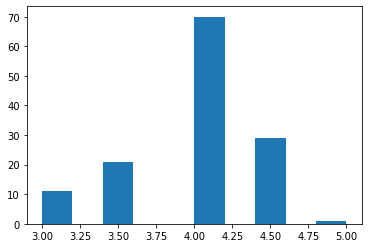

In [61]:
plt.hist(restaurants_lasvegas['stars'])

In [263]:
las_vegas_list = restaurants_lasvegas.business_id.unique().tolist()

In [265]:
lasvegas_reviews_df = reviews_df[reviews_df['business_id'].isin(las_vegas_list)]
lasvegas_reviews_df

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
266,drJ1crfdfmuuie6vxQSUhA,tL2pS5UOmN6aAOi3Z-qFGg,XXW_OFaYQkkGOGniujZFHg,5,2014-06-06,I've been here a half a dozen times over the y...,0,0,0
320,SyvB9pp9Na0sQevs26Dq3Q,tL2pS5UOmN6aAOi3Z-qFGg,g8OnV26ywJlZpezdBnOWUQ,3,2013-04-24,After having ate at this restaurant at the M H...,2,0,0
374,UmRtEJMPe86HKVs-WYuzmg,Y76nS3L426UCz7N_1pUfUQ,yfxDa8RFOvJPQh0rNtakHA,3,2016-06-22,"There weren't many vegetarian options, and I w...",0,0,0
379,sqX-4E1wsfW9CE6-RFwKmw,Y76nS3L426UCz7N_1pUfUQ,f4x1YBxkLrZg652xt2KR5g,4,2016-06-22,"I'd been to the Hash House downtown, but not t...",0,0,0
384,hsbY0RZ2gFZiSpLtNwuBig,Y76nS3L426UCz7N_1pUfUQ,XXW_OFaYQkkGOGniujZFHg,4,2016-05-22,"I've been here twice now, and there are defini...",0,0,0
...,...,...,...,...,...,...,...,...,...
5261462,UoWhxPbbJMPG_I4BOtaV-A,AOFDB60pjiXby08lx5HHYQ,I6EDDi4-Eq_XlFghcDCUhw,3,2016-02-18,Super disappointed. I think I just had high ex...,0,0,0
5261464,pX3cQu9wns0cP2uOn5ugZA,AOFDB60pjiXby08lx5HHYQ,RESDUcs7fIiihp38-d6_6g,3,2014-12-15,Buffets will always be buffets. But some of th...,1,0,0
5261530,WdTjSIXnwvoDHy64qdCc8w,5WX0Mg2QewtJSLsU8DtzfA,XZbuPXdyA0ZtTu3AzqtQhg,5,2017-01-12,Love this place. This was my third time here a...,0,0,1
5261544,27Z-VPuN5iyHZZb-v3CH-A,1VNqisX6ppOX5bYNsoWFTA,RwMLuOkImBIqqYj4SSKSPg,5,2017-07-13,This is the best taco place we've ever been to...,0,0,0


In [266]:
lasvegas_reviews_df['stars'] = lasvegas_reviews_df['stars'].apply(lambda x: 1 if x >= 4 else 0)
lasvegas_reviews_df

C:\Users\raych\AppData\Local\Temp\ipykernel_18572\897761436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lasvegas_reviews_df['stars'] = lasvegas_reviews_df['stars'].apply(lambda x: 1 if x >= 4 else 0)


,review_id,user_id,business_id,stars,date,text,useful,funny,cool
266,drJ1crfdfmuuie6vxQSUhA,tL2pS5UOmN6aAOi3Z-qFGg,XXW_OFaYQkkGOGniujZFHg,1,2014-06-06,I've been here a half a dozen times over the y...,0,0,0
320,SyvB9pp9Na0sQevs26Dq3Q,tL2pS5UOmN6aAOi3Z-qFGg,g8OnV26ywJlZpezdBnOWUQ,0,2013-04-24,After having ate at this restaurant at the M H...,2,0,0
374,UmRtEJMPe86HKVs-WYuzmg,Y76nS3L426UCz7N_1pUfUQ,yfxDa8RFOvJPQh0rNtakHA,0,2016-06-22,"There weren't many vegetarian options, and I w...",0,0,0
379,sqX-4E1wsfW9CE6-RFwKmw,Y76nS3L426UCz7N_1pUfUQ,f4x1YBxkLrZg652xt2KR5g,1,2016-06-22,"I'd been to the Hash House downtown, but not t...",0,0,0
384,hsbY0RZ2gFZiSpLtNwuBig,Y76nS3L426UCz7N_1pUfUQ,XXW_OFaYQkkGOGniujZFHg,1,2016-05-22,"I've been here twice now, and there are defini...",0,0,0
...,...,...,...,...,...,...,...,...,...
5261462,UoWhxPbbJMPG_I4BOtaV-A,AOFDB60pjiXby08lx5HHYQ,I6EDDi4-Eq_XlFghcDCUhw,0,2016-02-18,Super disappointed. I think I just had high ex...,0,0,0
5261464,pX3cQu9wns0cP2uOn5ugZA,AOFDB60pjiXby08lx5HHYQ,RESDUcs7fIiihp38-d6_6g,0,2014-12-15,Buffets will always be buffets. But some of th...,1,0,0
5261530,WdTjSIXnwvoDHy64qdCc8w,5WX0Mg2QewtJSLsU8DtzfA,XZbuPXdyA0ZtTu3AzqtQhg,1,2017-01-12,Love this place. This was my third time here a...,0,0,1
5261544,27Z-VPuN5iyHZZb-v3CH-A,1VNqisX6ppOX5bYNsoWFTA,RwMLuOkImBIqqYj4SSKSPg,1,2017-07-13,This is the best taco place we've ever been to...,0,0,0


(array([35266.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 82399.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

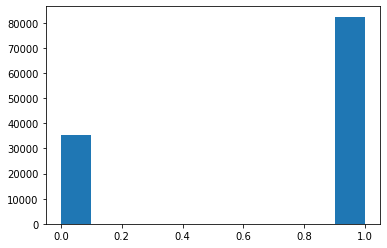

In [267]:
plt.hist(lasvegas_reviews_df['stars'])

## Combine reviews with business categories

In [268]:
restaurants_lasvegas

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,...,Nightlife,Salad,Seafood,Thai,Vietnamese,Downtown,Eastside,Southeast,The Strip,Westside
0,fL-b760btOaGa85OJ9ut3w,"""Rollin Smoke Barbeque""",The Strip,"""3185 S Highland Dr, Ste 2""",Las Vegas,NV,89109,36.132188,-115.177096,4.5,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
1,awI4hHMfa7H0Xf0-ChU5hg,"""Oyster Bar""",The Strip,"""2411 W Sahara Ave""",Las Vegas,NV,89102,36.142782,-115.174747,4.5,...,1.0,0.0,1.0,0.0,0.0,0,0,0,1,0
2,G-5kEa6E6PD5fkBRuA7k9Q,"""Giada""",The Strip,"""The Cromwell Las Vegas Resort & Casino, 3595 ...",Las Vegas,NV,89109,36.115059,-115.172109,3.5,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
3,rcaPajgKOJC2vo_l3xa42A,"""Bouchon at the Venezia Tower""",The Strip,"""3355 Las Vegas Blvd S, Venezia Tower, 10th fl...",Las Vegas,NV,89109,36.120955,-115.169853,4.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
5,f4x1YBxkLrZg652xt2KR5g,"""Hash House A Go Go""",The Strip,"""3535 Las Vegas Blvd""",Las Vegas,NV,89109,36.118181,-115.171580,4.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
6,UPIYuRaZvknINOd1w8kqRQ,"""Monta Ramen""",Chinatown,"""5030 Spring Mountain Rd, Ste 6""",Las Vegas,NV,89146,36.127034,-115.209682,4.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
7,eoHdUeQDNgQ6WYEnP2aiRw,"""Serendipity 3""",The Strip,"""Caesars Palace Las Vegas Hotel And Casino, 35...",Las Vegas,NV,89109,36.115670,-115.173317,3.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
8,XXW_OFaYQkkGOGniujZFHg,"""The Peppermill Restaurant & Fireside Lounge""",The Strip,"""2985 Las Vegas Blvd S""",Las Vegas,NV,89109,36.133667,-115.163095,4.0,...,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0
10,QJatAcxYgK1Zp9BRZMAx7g,"""Shake Shack""",The Strip,"""3790 Las Vegas Blvd S""",Las Vegas,NV,89109,36.103061,-115.173450,4.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
11,HhVmDybpU7L50Kb5A0jXTg,"""Guy Fieri's Vegas Kitchen & Bar""",The Strip,"""3535 S Las Vegas Blvd""",Las Vegas,NV,89109,36.118080,-115.172432,3.5,...,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0


In [269]:
lasvegas_reviews_df = lasvegas_reviews_df.merge(restaurants_lasvegas, how = "inner", on='business_id')
lasvegas_reviews_df


,review_id,user_id,business_id,stars_x,date,text,useful,funny,cool,name,...,Nightlife,Salad,Seafood,Thai,Vietnamese,Downtown,Eastside,Southeast,The Strip,Westside
0,drJ1crfdfmuuie6vxQSUhA,tL2pS5UOmN6aAOi3Z-qFGg,XXW_OFaYQkkGOGniujZFHg,1,2014-06-06,I've been here a half a dozen times over the y...,0,0,0,"""The Peppermill Restaurant & Fireside Lounge""",...,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0
1,hsbY0RZ2gFZiSpLtNwuBig,Y76nS3L426UCz7N_1pUfUQ,XXW_OFaYQkkGOGniujZFHg,1,2016-05-22,"I've been here twice now, and there are defini...",0,0,0,"""The Peppermill Restaurant & Fireside Lounge""",...,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0
2,9uu-5i7CngMzADPV4a348w,3wB-JjsUjkvdNUDRnChsVg,XXW_OFaYQkkGOGniujZFHg,1,2015-01-02,This is an interesting place. Most of it is a ...,8,4,6,"""The Peppermill Restaurant & Fireside Lounge""",...,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0
3,tv6fV_ko6YKukYqYZK7bvQ,GYXEHceoLVJ00e5YuV-TAw,XXW_OFaYQkkGOGniujZFHg,0,2009-01-05,"This is not a pleasant review to write, becaus...",0,0,0,"""The Peppermill Restaurant & Fireside Lounge""",...,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0
4,_uqPzQtmU0P-A854o6SmDQ,wgSwwgp-CJRL8Kpj3rx1yA,XXW_OFaYQkkGOGniujZFHg,1,2009-05-05,The best service I've had in a long time!! I h...,1,1,1,"""The Peppermill Restaurant & Fireside Lounge""",...,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117660,TJgo_54DnwzOMn3qD6leWA,fbtfuqOae_UDXWSAVkh-VA,3kdSl5mo9dWC4clrQjEDGg,1,2017-02-03,Big eggs benedict fan that I am...I had to com...,0,0,0,"""Egg & I""",...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
117661,z_1Jr1-4VI7nxuiTNtqjnA,kaz6NL11d2XgmIFLfDtx_w,3kdSl5mo9dWC4clrQjEDGg,0,2017-01-30,"I had chicken fried steak, portion is small ex...",0,0,1,"""Egg & I""",...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
117662,_0R3jIpex3S7E4svfy5kbA,jyk4whBmKIkIYYAAD89yng,3kdSl5mo9dWC4clrQjEDGg,1,2014-06-28,Great bfast after a nite of boozing. The banan...,0,0,1,"""Egg & I""",...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
117663,tRaS0MxbXJnODyMA4ibQJg,-t4TVbzTZDDvrFIEknI3pw,3kdSl5mo9dWC4clrQjEDGg,1,2015-09-19,One of the best breakfast places I've been to....,1,0,0,"""Egg & I""",...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1


## Adding users features

In [270]:
len(lasvegas_reviews_df.user_id.unique())

82018

In [271]:
users_df = pd.read_csv('yelp_user.csv')
users_df

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326095,LODBIwiAcKxRi7Wz-sFsKw,Neth,1,2015-02-21,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1326096,JpY2ozlb30z_AZCq2YX34g,Mike,1,2014-08-01,None,2,0,0,0,None,...,0,0,0,0,0,0,0,0,0,1
1326097,AU9aZSA1rAjNE5cFcZTVMA,Jalin,12,2015-11-11,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1326098,s1BZ7-rpqb3xRKcxvArXsQ,Cindy,33,2014-06-28,None,5,0,0,0,None,...,0,0,0,0,0,1,0,0,0,0


In [272]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326100 entries, 0 to 1326099
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   user_id             1326100 non-null  object 
 1   name                1325603 non-null  object 
 2   review_count        1326100 non-null  int64  
 3   yelping_since       1326100 non-null  object 
 4   friends             1326100 non-null  object 
 5   useful              1326100 non-null  int64  
 6   funny               1326100 non-null  int64  
 7   cool                1326100 non-null  int64  
 8   fans                1326100 non-null  int64  
 9   elite               1326100 non-null  object 
 10  average_stars       1326100 non-null  float64
 11  compliment_hot      1326100 non-null  int64  
 12  compliment_more     1326100 non-null  int64  
 13  compliment_profile  1326100 non-null  int64  
 14  compliment_cute     1326100 non-null  int64  
 15  compliment_list

#### Calculate standard deviation of stars

In [274]:
reviews_grouped_std = reviews_df.groupby('user_id')['stars'].std()

In [275]:
reviews_grouped_std = reviews_grouped_std.dropna()

In [276]:
reviews_grouped_std = reviews_grouped_std[reviews_grouped_std != 0]
reviews_grouped_std

user_id
---1lKK3aKOuomHnwAkAow    1.376859
---PLwSf5gKdIoVnyRHgBA    1.414214
---cu1hq55BP9DWVXXKHZg    1.732051
---udAKDsn0yQXmzbWQNSw    0.707107
--0kuuLmuYBe3Rmu0Iycww    1.435481
                            ...   
zzwTJAgONYCTeJia4te47g    0.577350
zzx7k7JqCQNhhqL4VJxL0A    1.414214
zzxZoMmjbUjXcWZzrE3PIw    0.816497
zzyMMeUZzKAy7KQhM7lU2w    2.828427
zzzAgDDWe4PTnJuwhi3XQQ    0.707107
Name: stars, Length: 479104, dtype: float64

In [277]:
user_std_df = pd.DataFrame({'user_id': reviews_grouped_std.index, 'stars_stddev': reviews_grouped_std.values})
user_std_df

,user_id,stars_stddev
0,---1lKK3aKOuomHnwAkAow,1.376859
1,---PLwSf5gKdIoVnyRHgBA,1.414214
2,---cu1hq55BP9DWVXXKHZg,1.732051
3,---udAKDsn0yQXmzbWQNSw,0.707107
4,--0kuuLmuYBe3Rmu0Iycww,1.435481
...,...,...
479099,zzwTJAgONYCTeJia4te47g,0.577350
479100,zzx7k7JqCQNhhqL4VJxL0A,1.414214
479101,zzxZoMmjbUjXcWZzrE3PIw,0.816497
479102,zzyMMeUZzKAy7KQhM7lU2w,2.828427


Calculate average of stars

In [278]:
reviews_grouped_avg = reviews_df.groupby('user_id')['stars'].mean()
user_avg_df = pd.DataFrame({'user_id': reviews_grouped_avg.index, 'stars_avg': reviews_grouped_avg.values})
user_avg_df

,user_id,stars_avg
0,---1lKK3aKOuomHnwAkAow,4.05042
1,---94vtJ_5o_nikEs6hUjg,5.00000
2,---PLwSf5gKdIoVnyRHgBA,4.00000
3,---cu1hq55BP9DWVXXKHZg,2.00000
4,---fhiwiwBYrvqhpXgcWDQ,1.00000
...,...,...
1326096,zzzPVqSxSvjzlLR3Q7wsUw,5.00000
1326097,zzzTkKLFo9CaeZnfO4TvzA,1.00000
1326098,zzzfcCWPDkg-kGVpqCKCEg,5.00000
1326099,zzzhFxwfzL56CQVnw8piTw,5.00000


In [279]:
user_std_df = user_std_df.merge(user_avg_df, how = "inner", on = 'user_id')

In [280]:
lasvegas_reviews_df = lasvegas_reviews_df.merge(user_std_df, how = "inner", on = 'user_id')
lasvegas_reviews_df

,review_id,user_id,business_id,stars_x,date,text,useful,funny,cool,name,...,Seafood,Thai,Vietnamese,Downtown,Eastside,Southeast,The Strip,Westside,stars_stddev,stars_avg
0,drJ1crfdfmuuie6vxQSUhA,tL2pS5UOmN6aAOi3Z-qFGg,XXW_OFaYQkkGOGniujZFHg,1,2014-06-06,I've been here a half a dozen times over the y...,0,0,0,"""The Peppermill Restaurant & Fireside Lounge""",...,0.0,0.0,0.0,0,0,0,1,0,1.067808,3.535519
1,SyvB9pp9Na0sQevs26Dq3Q,tL2pS5UOmN6aAOi3Z-qFGg,g8OnV26ywJlZpezdBnOWUQ,0,2013-04-24,After having ate at this restaurant at the M H...,2,0,0,"""Hash House A Go Go""",...,0.0,0.0,0.0,0,0,0,0,1,1.067808,3.535519
2,hsbY0RZ2gFZiSpLtNwuBig,Y76nS3L426UCz7N_1pUfUQ,XXW_OFaYQkkGOGniujZFHg,1,2016-05-22,"I've been here twice now, and there are defini...",0,0,0,"""The Peppermill Restaurant & Fireside Lounge""",...,0.0,0.0,0.0,0,0,0,1,0,0.835092,4.021429
3,WTFAWwEZd-EDLSgqbbTSSA,Y76nS3L426UCz7N_1pUfUQ,g8OnV26ywJlZpezdBnOWUQ,0,2017-04-06,I'd give this place a 3.5 if I could. The pan...,0,0,0,"""Hash House A Go Go""",...,0.0,0.0,0.0,0,0,0,0,1,0.835092,4.021429
4,UmRtEJMPe86HKVs-WYuzmg,Y76nS3L426UCz7N_1pUfUQ,yfxDa8RFOvJPQh0rNtakHA,0,2016-06-22,"There weren't many vegetarian options, and I w...",0,0,0,"""Pho Kim Long""",...,0.0,0.0,1.0,0,0,0,0,0,0.835092,4.021429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88849,3XLWrsDemRFc3R8zlrhPWA,zKSwd31uha5uwKEBnyB3ow,3kdSl5mo9dWC4clrQjEDGg,1,2017-03-24,This place is the egg-bomb! From the cute-n-se...,1,1,2,"""Egg & I""",...,0.0,0.0,0.0,0,0,0,0,1,0.951190,4.285714
88850,TJgo_54DnwzOMn3qD6leWA,fbtfuqOae_UDXWSAVkh-VA,3kdSl5mo9dWC4clrQjEDGg,1,2017-02-03,Big eggs benedict fan that I am...I had to com...,0,0,0,"""Egg & I""",...,0.0,0.0,0.0,0,0,0,0,1,1.718249,3.428571
88851,z_1Jr1-4VI7nxuiTNtqjnA,kaz6NL11d2XgmIFLfDtx_w,3kdSl5mo9dWC4clrQjEDGg,0,2017-01-30,"I had chicken fried steak, portion is small ex...",0,0,1,"""Egg & I""",...,0.0,0.0,0.0,0,0,0,0,1,1.612805,3.703704
88852,tRaS0MxbXJnODyMA4ibQJg,-t4TVbzTZDDvrFIEknI3pw,3kdSl5mo9dWC4clrQjEDGg,1,2015-09-19,One of the best breakfast places I've been to....,1,0,0,"""Egg & I""",...,0.0,0.0,0.0,0,0,0,0,1,1.341641,4.400000


In [281]:
lasvegas_reviews_df.to_csv('lasvegas_reviews_with_star_features.csv')